# [4주차] 심화과제: 수능 국어 문제 GPT-4로 풀어보기

# [MY CODE] JSON Data 로드 및 확인

In [1]:
import pandas as pd

json_data = pd.read_json('https://raw.githubusercontent.com/NomaDamas/KICE_slayer_AI_Korean/refs/heads/master/data/2023_11_KICE.json')
print(len(json_data))
json_data.head()

11


,id,paragraph,type,problems
0,2023_11_KICE_1-3,사람들이 지속적으로 책을 읽는 이유 중 하나는 즐거움이다. 독서의 즐거움에는 여러 ...,0,"[{'question': '윗글의 내용과 일치하지 않는 것은?', 'choices'..."
1,2023_11_KICE_4-9,(가)[A](중국에서 비롯된 유서(類書)는 고금의 서적에서 자료를 수집하고 항목별로...,0,"[{'question': '(가)와 (나)에 대한 설명으로 가장 적절한 것은?', ..."
2,2023_11_KICE_10-13,법령의 조문은 대개 ‘A에 해당하면 B를 해야 한다.’처럼 요건과효과로 구성된 조건...,0,"[{'question': '윗글의 내용과 일치하지 않는 것은?', 'choices'..."
3,2023_11_KICE_14-17,하루에 필요한 에너지의 양은 하루 동안의 총 열량 소모량인 대사량으로 구한다. 그중...,0,"[{'question': '윗글의 내용과 일치하지 않는 것은?', 'choices'..."
4,2023_11_KICE_18-21,혼례를 마친 후 최척이 아내와 함께 장모를 모시고 집으로 돌아오매 하인들이 기뻐했다...,1,"[{'question': '윗글에 대한 설명으로 가장 적절한 것은?', 'choic..."


In [2]:
json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         11 non-null     object
 1   paragraph  11 non-null     object
 2   type       11 non-null     int64 
 3   problems   11 non-null     object
dtypes: int64(1), object(3)
memory usage: 484.0+ bytes


# [MY CODE] 클래스 활용 데이터 전처리

In [3]:
class Paragraph:
    def __init__(self, data):
        self.id        = data['id']
        self.paragraph = data['paragraph']
        self.type      = data['type']
        self.problems  = []

        self._parse_problems(data['problems'])

    def _parse_problems(self, data_list):
        for data in data_list:
            problem = Problem(data, self.paragraph)
            self.problems.append(problem)

    def __str__(self):
        lines = f'Paragraph({self.id}): type({self.type})'
        for problem in self.problems:
            lines += f'\n\t- {problem.number}) {problem}'
        return lines

In [25]:
import re
def extract_number(s: str) -> int | None:
    # 가장 첫 번째로 나타나는 연속된 숫자 그룹을 찾아서 반환
    m = re.search(r'\d+', s)
    return int(m.group()) if m else None

In [30]:
import json

class Problem:
    _number = 0

    def __init__(self, data, paragraph=None):
        if 'number' in data:
            self.number = data['number']
        else:
            Problem._number += 1
            self.number = Problem._number

        self.paragraph = data['paragraph'] if 'paragraph' in data else paragraph
        self.question_plus = data['question_plus'] if 'question_plus' in data else ''
        self.question = data['question']
        self.choices = data['choices']
        self.answer = data['answer']
        self.score = data['score']

    def predict(self, label):
        label_extracted = extract_number(label)
        return self.score if int(label_extracted) == int(self.answer) else 0

    def to_json(self):
        problem_dict = {
            "number": self.number,
            "paragraph": self.paragraph,
            "question_plus": self.question_plus,
            "question": self.question,
            "choices": self.choices,
            "answer": self.answer,
            "score": self.score
        }

        return json.dumps(problem_dict, ensure_ascii=False, indent=4)

    def __str__(self):
        return self.question

In [5]:
problem_list = []

for i in range(len(json_data)):
    paragraph_data = json_data.iloc[i]
    paragraph = Paragraph(paragraph_data)
    for problem in paragraph.problems:
        problem_list.append(problem)
    print(paragraph)

Paragraph(2023_11_KICE_1-3): type(0)
	- 1) 윗글의 내용과 일치하지 않는 것은?
	- 2) 다음은 학생이 독서 후 작성한 글의 일부이다. [A]를 바탕으로 ⓐ～ⓔ를 이해한 내용으로 가장 적절한 것은?
	- 3) 윗글을 읽고 ㉠에 대해 보인 반응으로 적절하지 않은 것은?
Paragraph(2023_11_KICE_4-9): type(0)
	- 4) (가)와 (나)에 대한 설명으로 가장 적절한 것은?
	- 5) [A]에 대한 이해로 적절하지 않은 것은?
	- 6) ㉮에 대한 이해를 바탕으로 ㉠, ㉡에 대해 파악한 내용으로 적절하지 않은 것은?
	- 7) ㉯를 반박하기 위한 ‘이수광’의 말로 가장 적절한 것은?
	- 8) (가), (나)를 읽은 학생이 <보기>의 임원경제지에 대해 보인 반응으로 적절하지 않은 것은?
	- 9) 문맥상 ⓐ～ⓔ와 바꾸어 쓰기에 적절하지 않은 것은?
Paragraph(2023_11_KICE_10-13): type(0)
	- 10) 윗글의 내용과 일치하지 않는 것은?
	- 11) ㉠에 대한 이해로 가장 적절한 것은?
	- 12) 윗글을 바탕으로 <보기>를 이해한 내용으로 가장 적절한 것은? [3점]
	- 13) 문맥상 ⓐ～ⓔ의 의미와 가장 가까운 것은?
Paragraph(2023_11_KICE_14-17): type(0)
	- 14) 윗글의 내용과 일치하지 않는 것은?
	- 15) 윗글을 읽고 추론한 내용으로 적절하지 않은 것은?
	- 16) ㉠, ㉡에 대한 이해로 가장 적절한 것은?
	- 17) 윗글을 바탕으로 <보기>를 탐구한 내용으로 가장 적절한 것은?
Paragraph(2023_11_KICE_18-21): type(1)
	- 18) 윗글에 대한 설명으로 가장 적절한 것은?
	- 19) 윗글의 인물에 대한 이해로 적절하지 않은 것은?
	- 20) ㉠～㉤에 대한 이해로 가장 적절한 것은?
	- 21) <보기>를 바탕으로 윗글을 감상한 내용으로 적절하지 않은것은?
Paragraph(2023_11_KICE_22

In [6]:
print(problem_list[0].to_json())

{
    "number": 1,
    "paragraph": "사람들이 지속적으로 책을 읽는 이유 중 하나는 즐거움이다. 독서의 즐거움에는 여러 가지가 있겠지만 그 중심에는 ‘소통의 즐거움’이 있다.독자는 독서를 통해 책과 소통하는 즐거움을 경험한다. 독서는필자와 간접적으로 대화하는 소통 행위이다. 독자는 자신이 속한사회나 시대의 영향 아래 필자가 속해 있거나 드러내고자 하는 사회나 시대를 경험한다. 직접 경험하지 못했던 다양한 삶을 필자를 매개로 만나고 이해하면서 독자는 더 넓은 시야로 세계를바라볼 수 있다. 이때 같은 책을 읽은 독자라도 독자의 배경지식이나 관점 등의 독자 요인, 읽기 환경이나 과제 등의 상황 요인이 다르므로, 필자가 보여 주는 세계를 그대로 수용하지 않고 저마다 소통 과정에서 다른 의미를 구성할 수 있다.[A] (이러한 소통은 독자가 책의 내용에 대해 질문하고 답을 찾아내는 과정에서 가능해진다. 독자는 책에서 답을 찾는 질문, 독자 자신에게서 답을 찾는 질문 등을 제기할 수 있다. 전자의 경우 책에 명시된 내용에서 답을 발견할 수 있고, 책의 내용들을 관계 지으며 답에 해당하는 내용을 스스로 구성할 수도 있다. 또한 후자의 경우 책에는 없는 독자의 경험에서 답을 찾을 수 있다. 이런 질문들을 풍부히 생성하고 주체적으로 답을 찾을 때 소통의 즐거움은 더 커진다.)한편 독자는 ㉠ (다른 독자와 소통하는 즐거움을 경험할 수도 있다.) 책과의 소통을 통해 개인적으로 형성한 의미를 독서 모임이나 독서 동아리 등에서 다른 독자들과 나누는 일이 이에 해당한다. 비슷한 해석에 서로 공감하며 기존 인식을 강화하거나 관점의 차이를 확인하고 기존 인식을 조정하는 과정에서, 독자는자신의 인식을 심화 확장할 수 있다. 최근 소통 공간이 온라인으로 확대되면서 독서를 통해 다른 독자들과 소통하며 즐거움을누리는 양상이 더 다양해지고 있다. 자신의 독서 경험을 담은 글이나 동영상을 생산 공유함으로써, 책을 읽지 않은 타인이 책과 소통하도록 돕는 것도 책을 통한 소통

# [MY CODE] OpenAI ChatClient

In [7]:
from openai import OpenAI
import getpass

api_key = getpass.getpass('Enter your API key: ')

class OpenAIChatClient:
    def __init__(self, api_key, model = "gpt-4o"):
        self.client = OpenAI(api_key=api_key)
        self.model = model
        self.n = 1
        self.max_tokens = 4096
        self.temperature = 0.5
        self.frequency_penalty = 0.0

    def get_response(self, messages):

        if isinstance(messages, str):
            temp = [
                         {
                            "role": "user",
                            "content": messages
                        }
                    ]
            messages = temp

        response = self.client.chat.completions.create(
            model=self.model,
            n=self.n,
            max_tokens=self.max_tokens,
            temperature=self.temperature,
            frequency_penalty=self.frequency_penalty,
            messages=messages
        )
        return response.choices[0].message.content

Enter your API key: ··········


In [37]:
model_name = "gpt-4.1-nano"
chatgpt_client = OpenAIChatClient(api_key, model_name)
print(chatgpt_client.get_response('안녕 넌 누구니?'))

안녕하세요! 저는 OpenAI가 만든 인공지능 언어 모델인 ChatGPT입니다. 무엇을 도와드릴까요?


# [MY CODE] 프롬프트

In [26]:
base_prompt = """
당신은 고등학교 국어 선생님입니다. 다음 문제의 답을 구하세요.
지문을 읽고, 지문 내용과 관련된 질문에 대한 답을 1부터 5까지의 선택지 중에 한 개만 골라서 대답해야 합니다.

문제를 풀이할 때, 반드시 지문을 참고하세요.
문제를 풀이할 때 모든 선택지들을 검토하세요.
모든 선택지마다 근거를 지문에서 찾아 설명하세요.

## 답변은 반드시 1~5 숫자 중 하나만 출력해야 합니다.
## 절대로 설명, 이유, 텍스트를 덧붙이지 마세요. 숫자만 출력하세요.

다음 내용을 읽고 질문에 답하세요.

[지문]
{paragraph}

[질문]
{question}

[보기]
{question_plus}

[선택지]
{choice}
"""

class PromptTemplate:
    def __init__(self, name, prompt):
        self.name = name
        self.prompt = base_prompt + prompt

    def compile(self, paragraph, question, question_plus, choice):
        return self.prompt.format(
            paragraph=paragraph,
            question=question,
            question_plus=question_plus,
            choice=choice
        )


prompt_templates = []

'''
TODO: 자유자재로 최대한 많은 종류의 프롬프팅 기법들을 활용하여 점수를 비교해보세요!!
'''

#base
prompt_templates.append(PromptTemplate('base', """
"""))
# COT
prompt_templates.append(PromptTemplate('zero_shot_cot', """
단계별로 생각하며 정답을 고르세요.

"""))

# 감정에 호소
prompt_templates.append(PromptTemplate('emotional', """
이 문제를 풀지 못하면 저와 제 가족들의 인생이 고달파집니다. 이것은 제 마지막 수능 시험입니다. 저와 가족의 평화를 위해 꼭 정답을 찾아주세요.

"""))

# 퓨샷 프롬프트
prompt_templates.append(PromptTemplate('few_shot', """

다음은 전년도 수능 국어 시험의 문제와 풀이입니다.

<문제 1>
지문 :
안녕하세요? 지난 수업 시간에 곰팡이의 생육 환경에 대해 우리가 조사했던 활동이 기억나나요? (청중의 반응을 듣고) 네, 기억하는군요. 자료를 더 찾아보니 식물 뿌리와 함께 사는 곰팡이에 관한 흥미로운 사실이 있어 소개하려 합니다.식물 뿌리와 함께 사는 곰팡이가 식물 뿌리와 상호 작용한다는 것을 알고 있나요? (청중의 반응을 살피고) 대부분 모르는군요. 곰팡이와 식물 뿌리의 상호 작용에는 곰팡이의 균사가 중요한 역할을 합니다. (㉠(화면) 제시) 이렇게 식물 뿌리를 감싸고 있는 실처럼 생긴 것이 곰팡이의 균사인데요, 균사는 곰팡이의 몸을 이루는 세포가 실 모양으로 이어진 것을 말합니다.식물 뿌리와 연결된 곰팡이의 균사는 양분이 오가는 통로가 됩니다. 마치 서로를 잇는 다리와 같은 역할을 하지요. (㉡(화면) 제시) 이렇게 곰팡이가 토양에서 흡수한 양분은 식물 뿌리로 전달되고, 식물이 광합성으로 만든 양분도 곰팡이로 전달됩니다. 또한 균사는 땅속에서 퍼져 나가면서 거리가 떨어져 있는 식물 뿌리와 연결될 수 있고, 한 식물의 뿌리와 또 다른 식물의 뿌리를 연결할 수도 있습니다. 식물과 식물을 연결한 균사를 통해 양분이 식물 간에 전달되지요.아, 질문이 있네요. (ⓐ(질문)을 듣고) 곰팡이나 식물에 눈이 있어 서로를 찾아가는 것은 아닙니다. 곰팡이와 식물 뿌리는 각각 상대의 생장을 촉진하는 물질을 내놓아 상대를 자기 쪽으로 유인하여 만날 수 있지요. 이해되었나요? (고개를 끄덕이는 모습을 보고) 그럼 발표를 이어 가겠습니다.곰팡이의 균사가 식물 뿌리와 연결되는 방식은 곰팡이에 따라 다릅니다. 예를 들어, (㉢(화면) 제시) 화면의 왼쪽처럼 균사가 식물 뿌리 세포의 내부로 들어가는 곰팡이가 있고, 화면의 오른쪽처럼 균사가 식물 뿌리의 겉면이나 식물 뿌리 세포를 감싸는 곰팡이도 있습니다.곰팡이와 식물 뿌리의 상호 작용이 흥미롭지 않나요? 발표 내용이 잘 이해되었기를 바라며 이만 마치겠습니다.

질문 :
위 발표에 활용된 발표 전략으로 적절하지 않은 것은?

선택지 :
1번 - 청중의 주의를 환기하기 위해 청중과 공유하고 있는 경험을 언급한다.
2번 - 청중이 발표 내용을 예측하도록 발표 내용의 제시 순서를 발표 도입에서 밝힌다.
3번 - 청중이 발표 내용에 대해 사전에 알고 있었는지 확인하기 위해 발표 내용과 관련된 질문을 한다.
4번 - 청중이 특정 대상의 개념을 파악하도록 대상의 정의를 제시한다.
5번 - 청중의 이해를 돕기 위해 특정 대상을 일상적 소재에 빗대어 표현한다.

정답해설 :
발표자는 질문을 듣고 곰팡이나 식물에 눈이 있어 서로를 찾아가는 것은 아니라고 언급하며, 곰팡이와 식물 뿌리는 각각 상대의 생장을 촉진하는 물질을 내놓 아 상대를 자기 쪽으로 유인하여 만날 수 있다고 답변하였다. 이는 곰팡이의 균사는 거리가 떨어져 있는 식물 뿌리와 연결될 수 있다는 3문단의 내용과 관련이 있다. 따 라서 발표자의 답변 내용을 바탕으로 청중이 ‘서로 떨어져 있는 곰팡이의 식물 뿌리 가 어떻게 닿을 수 있나요?’라고 질문했음을 추측할 수 있다.

정답 : 3번

다음은 전년도 수능 국어 시험의 문제와 풀이입니다.

<문제 2>
지문 :
다음 글을 읽고 물음에 답하시오. 일일은 승상이 술에 취하시어 ⓐ(책상)에 의지하여 잠깐 졸더니 문득 봄바람에 이끌려 한 곳에 다다르니 이곳은 승상이 평소에 고기도 낚으며 풍경을 구경하던 조대(釣臺)*라. 그 위에 상서로운 기운이 어렸거늘 나아가 보니 청룡이 ⓑ(조대)에 누웠다가 승상을 보고 고개를 들어 소리를 지르고 반공에 솟거늘, 깨달으니 일장춘몽이라. [A](심신이 황홀하여 죽장을 짚고 월령산 ⓒ(조대)로 나아가니 나무 베는 아이가 나무를 베어 시냇가에 놓고 버들 그늘을 의지하여 잠이 깊이 들었거늘, 보니 의상이 남루하고 머리털이 흩어져 귀밑을 덮었으며 검은 때 줄줄이 흘러 두 뺨에 가득하니 그 추레함을 측량치 못하나 그 중에도 은은한 기품이 때 속에 비치거늘 승상이 깨우지 않으시고, 옷에 무수한 이를 잡아 죽이며 잠 깨기를 기다리더니, 그 아이가 돌아누우며 탄식 왈,  “㉠(형산백옥이 돌 속에 섞였으니 누가 보배인 줄 알아보랴. 여상의 자취 조대에 있건마는 그를 알아본 문왕의 그림자 없고 와룡은 남양에 누웠으되 삼고초려한 유황숙의 자취는 없으니 어느 날에 날 알아줄 이 있으리오.)”하니 그 소리 웅장하여 산천이 울리는지라.) 탈속한 기운이 소리에 나타나니, 승상이 생각하되, ‘영웅을 구하더니 이제야 만났도다.’ 하시고, 깨우며 물어 왈,“봄날이 심히 곤한들 무슨 잠을 이리 오래 자느냐? 일어앉으면 물을 말이 있노라.”“어떤 사람이관데 남의 단잠을 깨워 무슨 말을 묻고자 하는가? 나는 배고파 심란하여 말하기 싫도다.”아이 머리를 비비며 군말하고 도로 잠이 들거늘, 승상이 왈,“네 비록 잠이 달지만 어른을 공경치 아니하느냐. 눈을 들어 날 보면 자연 알리라.”그 아이 눈을 뜨고 이윽히 보다가 일어앉으며 고개를 숙이고 잠잠하거늘, 승상이 자세히 보니 두 눈썹 사이에 천지조화를 갈무리하고 가슴속에 만고흥망을 품었으니 진실로 영웅이라. 승상의 ㉡(명감(明鑑)*)이 아니면 그 누가 알리오.[중략 부분의 줄거리] 승상은 아이(소대성)를 자기 집에 묵게 하고 딸과 부부의 연을 맺도록 하지만, 승상이 죽자 그 아들들이 대성을 제거하려고 한다. 이에 대성은 영보산으로 옮겨 공부하다가 호왕이 난을 일으킨 소식에 산을 나가게 된다.한 동자 마중 나와 물어 왈,“상공이 해동 소상공 아니십니까?”“동자, 어찌 나를 아는가?”소생이 놀라 묻자, 동자 답 왈, “우리 노야의 분부를 받들어 기다린 지 오랩니다.”“노야라 하시는 이는 뉘신고?”“아이 어찌 어른의 존호를 알리이까? 들어가 보시면 자연 알리이다.” [B](생이 동자를 따라 들어가니 청산에 불이 명랑하고 한 노인이 자줏빛 도포를 입고 금관을 쓰고 책상을 의지하여 앉았거늘 생이 보니 학발 노인은 청주 이 승상일러라. 생이 생각하되, ‘승상이 별세하신 지 오래이거늘 어찌 ⓓ(이곳)에 계신가?’ 하는데, 승상이 반겨 손을 잡고 왈,  “내 그대를 잊지 못하여 줄 것이 있어 그대를 청하였나니 기쁘고도 슬프도다.”)하고 동자를 명하여 저녁을 재촉하며 왈,“내 자식이 무도하여 그대를 알아보지 못하고 망령된 의사를 두었으니 어찌 부끄럽지 아니하리오. 하나 그대는 대인군자로 허물치 아니할 줄 알았거니와 모두 하늘의 뜻이라. 오래지 아니하여 공명을 이루고 용문에 오르면 딸과의 신의를 잊지 말라.”하고 갑주 한 벌을 내어 주며 왈,“이 갑주는 보통 물건이 아니라 입으면 내게 유익하고 남에게 해로우며 창과 검이 뚫지 못하니 천하의 얻기 어려운 보배라. 그대를 잊지 못하여 정을 표하나니 전장에 나가 대공을 이루라.”생이 자세히 보니 쇠도 아니요, 편갑도 아니로되 용의 비늘 같이 광채 찬란하며 백화홍금포로 안을 대었으니 사람의 정신이 황홀한지라. 생이 매우 기뻐 물어 왈,“이 옷이 범상치 아니하니 근본을 알고자 하나이다.”“이는 천공의 조화요, 귀신의 공역이라. 이름은 ‘보신갑’이니 그 조화를 헤아리지 못하리라. 다시 알아 무엇 하리오?”승상이 답하시고, 차를 내어 서너 잔 마신 후에 승상 왈,“이제 칠성검과 보신갑을 얻었으니 만 리 청총마를 얻으면 그대 재주를 펼칠 것이나, 그렇지 아니하면 당당한 기운을 걷잡지 못하리라. 하나 적을 가벼이 여기지 말라. 지금 적장은 천상 나타의 제자 익성이니 북방 호국 왕이 되어 중원을 침노하니 지혜와 용맹이 범인과 다른지라. 삼가 조심하라.”“만 리 청총마를 얻을 길이 없으니 어찌 공명을 이루리까?”생이 묻자, 승상이 답 왈,“동해 용왕이 그대를 위하여 이리 왔으니 내일 오시에 얻을 것이니 급히 공을 이루라. 지금 싸움이 오래되었으나 중국은 익성을 대적할 자 없으며 황제 지금 위태한지라. 머물지 말고 바삐 가라. 할 말이 끝없으나 밤이 깊었으니 자고 가라.”하시고 책상을 의지하여 누우시니 생도 잠깐 졸더니, 홀연 찬바람, 기러기 소리에 깨달으니 승상은 간데없고 누웠던 자리에 갑옷과 투구 놓였거늘 좌우를 둘러보니 ⓔ(소나무) 밑이라.- 작자 미상, ｢소대성전｣ -* 조대 : 낚시터.* 명감 : 사람을 알아보는 뛰어난 능력.

질문 :
＜보기＞를 참고할 때, ⓐ∼ⓔ를 이해한 내용으로 적절하지 않은 것은? [3점]

<보기> :
고전 소설에서 공간은 산속이나 동굴 등 특정 현실 공간 에 초현실 공간이 겹쳐진 것으로 설정되기도 한다. 이 경우, 초현실 공간이 특정 현실 공간에 겹쳐지거나 특정 현실 공간에서 사라지는 것은 보통 초월적 존재의 등·퇴장과 관련된다. 한편 어떤 인물이 꿈을 꿀 때, 그는 현실의 어떤 공간에서 잠을 자고 있지만, 그의 정신은 꿈속 공간을 경험한다. 이 경우, 특정 현실 공간이 꿈에 나타나면 이 꿈속 공간은 특정 현실 공간에 근거하면서도 초현실 공간의 성격을 지니기도 한다.

선택지 :
1번 - ‘승상’은 ⓐ에 몸을 의지하고 있지만 정신은 봄바람에 이끌려 ⓑ로 나아갔으니, 그는 현실의 한 공간에서 잠들어 꿈속 공간을 경험하고 있는 것이군.
2번 - ⓑ는 ⓒ에 근거를 둔 꿈속 공간으로, ⓑ에서 본 ‘청룡’은 ⓒ에서 자고 있는 ‘아이’를 상징하는군.
3번 - ⓑ와 ⓓ는 모두 초현실 공간으로, ⓑ는 ‘승상’을 ‘아이’에게로 이끌기 위해, ⓓ는 ‘소생’과 초월적 존재인 ‘승상’의 만남을 위해 설정된 곳이군.
4번 - ⓒ는 ‘승상’의 정신이 경험하는 꿈속 공간이고, ⓔ는 ‘소생’이 자기 경험이 꿈이었음을 확인하는 공간이군.
5번 - ‘승상’이 ‘누웠던 자리’에 ‘갑옷과 투구’가 놓여 있는 것으로 보아, ⓔ에 ⓓ가 겹쳐져 있었지만 ‘승상’이 사라지면서 ⓓ도 함께 사라졌군.

정답해설 :
ⓒ(조대)는 ⓐ(책상)에서 꿈을 통해 이동한 ⓑ(조대)와 동일한 공간적 성격을 지니고 있지 않다. 즉 ⓒ는 ‘승상’이 꿈을 통해 이동한 초현실 공간(ⓑ)에서 돌아온 후에 이동한 특정 현실 공간으로, 그가 실제로 경험한 공간이다. 따라서 ⓒ는 “‘승상’ 의 정신이 경험하는 꿈속 공간”이 아니다.

정답 : 4번

실제 답변:
"""))

# 자극하기
prompt_templates.append(PromptTemplate('Aggro', """
이 문제는 한국의 가장 똑똑한 국어 선생님들도 틀리도록 평가원에서 만들었으니, 너같은 인공지능은 절대 못 풀어.
"""))

# 자극하기
prompt_templates.append(PromptTemplate('template', """
1: (선택지 1에 대한 답변) + "(지문 속 근거가 된 문장)"
2: (선택지 2에 대한 답변) + "(지문 속 근거가 된 문장)"
3: (선택지 3에 대한 답변) + "(지문 속 근거가 된 문장)"
4: (선택지 4에 대한 답변) + "(지문 속 근거가 된 문장)"
5: (선택지 5에 대한 답변) + "(지문 속 근거가 된 문장)"

최종 정답:
"""))



# [MY CODE] 문제 풀기

In [21]:
def predict(json_text, prompt_template):
    problem = Problem(json.loads(json_text))

    choice_text = ''
    for idx, text in enumerate(problem.choices):
        choice_text += f'({idx+1}): {text}\n'

    prompt = prompt_template.compile(
        paragraph=problem.paragraph,
        question=problem.question,
        question_plus=problem.question_plus,
        choice=choice_text
    )

    #print(prompt_template.prompt)

    answer = chatgpt_client.get_response(prompt)
    score = problem.predict(answer)
    print(f'{problem.number}번 문제: (정답:{problem.answer}), (예측:{answer}) -> [점수:{score}점]' )
    return score

# [MY CODE] 프롬프트별 예측 및 비교

In [38]:
import os
# 기존 점수 데이터 로드
file_path = './score.csv'
#print(score_df)
if os.path.exists(file_path):
    score_df = pd.read_csv(file_path)
else:
    # 빈 데이터프레임 생성
     score_df = pd.DataFrame(columns=['prompt', 'model', 'score'])


for prompt_template in prompt_templates:
    total_score = 0

    existing = score_df[
        (score_df['prompt'] == prompt_template.name) &
        (score_df['model'] == model_name)
    ]

    if not existing.empty:
        # 이미 존재하면 점수 출력
        total_score = score_df.loc[score_df['prompt'] == prompt_template.name, 'score'].values[0]
    else:
        print(f"채점 시작({prompt_template.name})!")

        for problem in problem_list:
            score = predict(problem.to_json(), prompt_template)
            total_score += score

        # 존재하지 않으면 새로운 데이터프레임 추가
        new_row = {'prompt': prompt_template.name, 'score': total_score, "model": model_name}
        score_df = pd.concat([score_df, pd.DataFrame([new_row])], ignore_index=True)
        score_df.to_csv(file_path, index=False)

    print(f"{prompt_template.name} 프롬프트 점수: {total_score}")

채점 시작(base)!
1번 문제: (정답:4), (예측:3) -> [점수:0점]
2번 문제: (정답:5), (예측:3) -> [점수:0점]
3번 문제: (정답:1), (예측:1) -> [점수:2점]
4번 문제: (정답:4), (예측:4) -> [점수:2점]
5번 문제: (정답:5), (예측:1) -> [점수:0점]
6번 문제: (정답:3), (예측:2) -> [점수:0점]
7번 문제: (정답:2), (예측:2) -> [점수:2점]
8번 문제: (정답:5), (예측:3) -> [점수:0점]
9번 문제: (정답:2), (예측:2) -> [점수:2점]
10번 문제: (정답:4), (예측:4) -> [점수:2점]
11번 문제: (정답:5), (예측:4) -> [점수:0점]
12번 문제: (정답:2), (예측:2) -> [점수:3점]
13번 문제: (정답:5), (예측:5) -> [점수:2점]
14번 문제: (정답:3), (예측:3) -> [점수:2점]
15번 문제: (정답:4), (예측:2) -> [점수:0점]
16번 문제: (정답:4), (예측:3) -> [점수:0점]
17번 문제: (정답:1), (예측:3) -> [점수:0점]
18번 문제: (정답:4), (예측:3) -> [점수:0점]
19번 문제: (정답:3), (예측:3) -> [점수:2점]
20번 문제: (정답:3), (예측:2) -> [점수:0점]
21번 문제: (정답:5), (예측:3) -> [점수:0점]
22번 문제: (정답:1), (예측:3) -> [점수:0점]
23번 문제: (정답:5), (예측:2) -> [점수:0점]
24번 문제: (정답:3), (예측:3) -> [점수:3점]
25번 문제: (정답:3), (예측:3) -> [점수:2점]
26번 문제: (정답:4), (예측:5) -> [점수:0점]
27번 문제: (정답:1), (예측:2) -> [점수:0점]
28번 문제: (정답:5), (예측:5) -> [점수:2점]
29번 문제: (정답:1), (예측:3) -> [점수:0점]
30번 문제: (정

In [39]:
score_df

,prompt,model,score
0,zero_shot_cot,gpt-4o,94
1,emotional,gpt-4o,89
2,few_shot,gpt-4o,86
3,Aggro,gpt-4o,93
4,template,gpt-4o,89
5,base,gpt-4o,86
6,base,gpt-4o-mini,64
7,zero_shot_cot,gpt-4o-mini,65
8,emotional,gpt-4o-mini,69
9,few_shot,gpt-4o-mini,64


In [43]:
import pandas as pd

# 피벗 테이블 생성: 행=model, 열=prompt, 값=score
pivot_df = score_df.pivot(index="model", columns="prompt", values="score")
model_order = ['gpt-4o', 'gpt-4.1-mini', 'gpt-4o-mini', 'gpt-4.1-nano']
sorted_pivot_df = pivot_df.loc[model_order]
# 결과 출력
display(sorted_pivot_df)



prompt,Aggro,base,emotional,few_shot,template,zero_shot_cot
model,,,,,,
gpt-4o,93,86,89,86,89,94
gpt-4.1-mini,83,85,80,73,81,87
gpt-4o-mini,76,64,69,64,71,65
gpt-4.1-nano,43,42,38,25,46,35


<Figure size 1000x600 with 0 Axes>

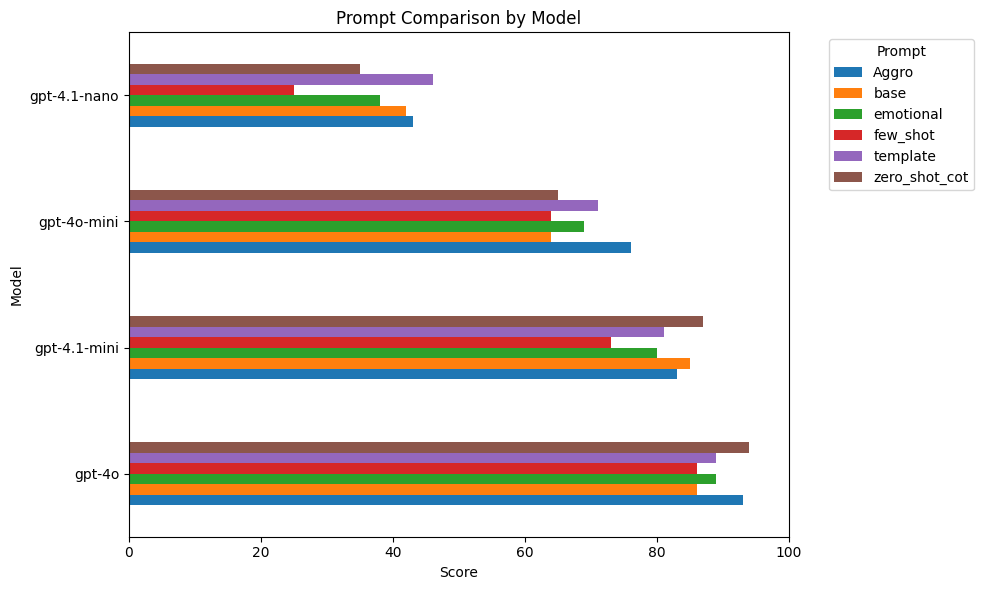

In [49]:
# 수평 막대그래프 그리기
plt.figure(figsize=(10, 6))
sorted_pivot_df.plot(kind='barh', figsize=(10, 6))

# 그래프 꾸미기
plt.title("Prompt Comparison by Model")
plt.xlabel("Score")
plt.ylabel("Model")
plt.xlim(0, 100)
plt.legend(title="Prompt", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


📈 가장 평균 점수가 높은 모델: gpt-4o (평균 89.5점)

📉 가장 평균 점수가 낮은 모델: gpt-4.1-nano (평균 38.17점)

📈 가장 점수가 높은 프롬프트 : zero-shot-cot (gpt-4o)

📉 가장 점수가 낮은 프롬프트 : few-shot (gpt-4.1-nano)

### 모델별 가장 점수가 높은 프롬프트
gpt-4o → **zero_shot_cot** (94점)

gpt-4.1-mini → zero_shot_cot (87점)

gpt-4o-mini → Aggro (76점)

gpt-4.1-nano → template (46점)

### 모델별 가장 점수가 낮은 프롬프트
gpt-4o → base (86점)

gpt-4.1-mini → few_shot (73점)

gpt-4o-mini → base (64점)

gpt-4.1-nano → **few_shot** (25점)

## 프롬프트별 모델 점수 분포

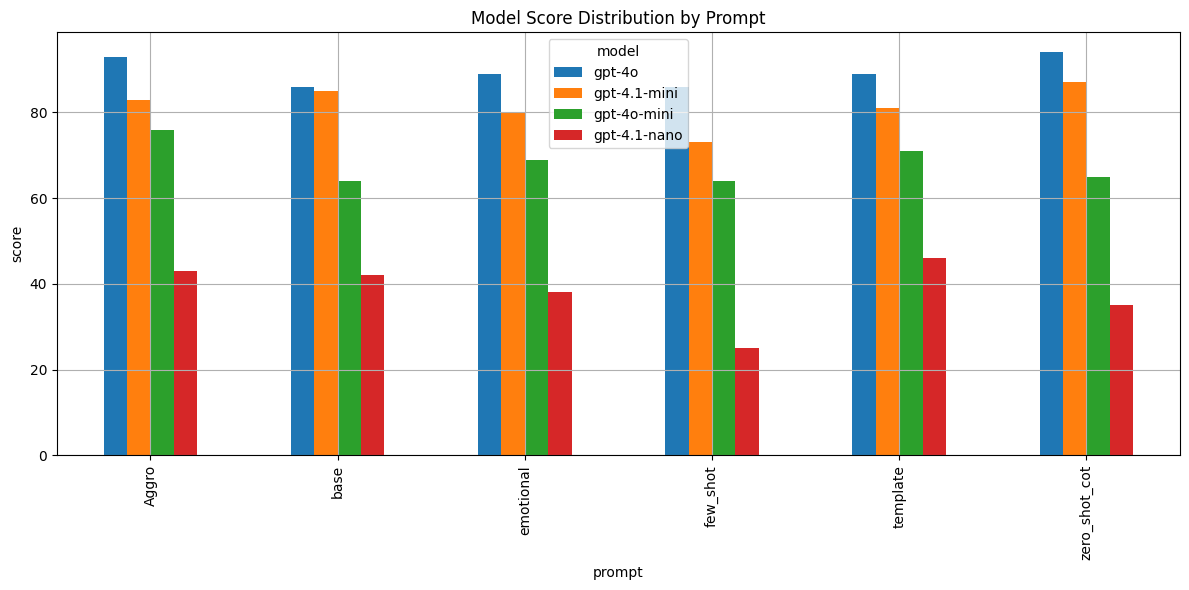

In [46]:
import matplotlib.pyplot as plt
# 프롬프트 기준 전치 (transpose)
df_T = sorted_pivot_df.T

# 막대그래프 그리기
df_T.plot(kind='bar', figsize=(12, 6))

# 그래프 설정
plt.title('Model Score Distribution by Prompt')
plt.xlabel('prompt')
plt.ylabel('score')
plt.legend(title='model')
plt.grid(True)
plt.tight_layout()
plt.show()

## 평균 성능이 가장 좋은 프롬프트

🥇 Aggro - AI를 자극하는 프롬프트 (평균 점수: 73.75)

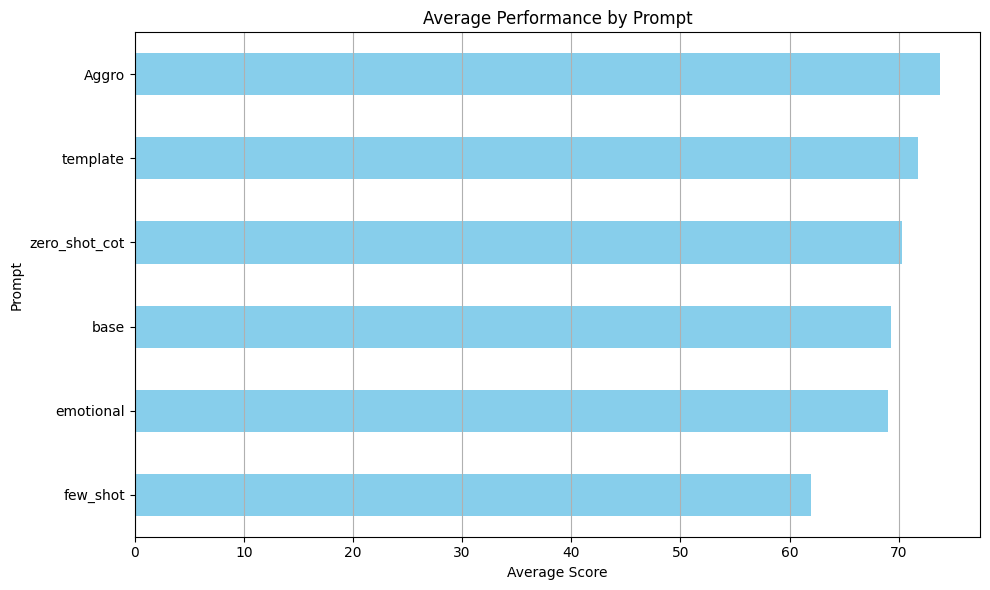

In [47]:


# 프롬프트별 평균 점수 계산
avg_score_by_prompt = sorted_pivot_df.mean(axis=0)

# 평균 점수를 DataFrame으로 정리
avg_score_by_prompt_df = avg_score_by_prompt.to_frame(name="Average Score").sort_values(by="Average Score", ascending=False)

# ▶ 평균 점수 시각화: 수평 막대 그래프
plt.figure(figsize=(10, 6))
avg_score_by_prompt.sort_values().plot(kind='barh', color='skyblue')
plt.title("Average Performance by Prompt")
plt.xlabel("Average Score")
plt.ylabel("Prompt")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


## 모델 표준편차 비교

표준편차가 클 수록 프롬프트에 따라 성능 기복이 큼

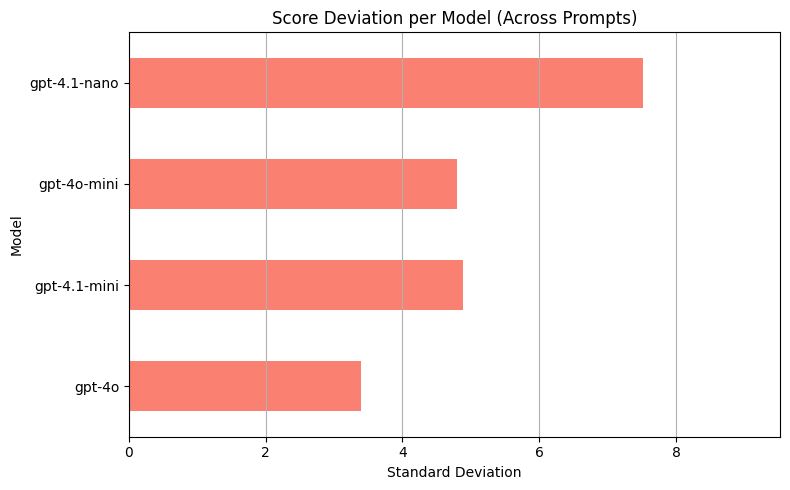

In [51]:
# 모델별 표준편차 계산
model_std = sorted_pivot_df.std(axis=1)

# 시각화
plt.figure(figsize=(8, 5))
model_std.plot(kind='barh', color='salmon')

plt.title("Score Deviation per Model (Across Prompts)")
plt.xlabel("Standard Deviation")
plt.ylabel("Model")
plt.xlim(0, model_std.max() + 2)
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()